## Logistic Regression: Fit and evaluate a model

Using the Titanic dataset from [this](https://www.kaggle.com/c/titanic/overview) Kaggle competition.

In this section, we will fit and evaluate a simple Logistic Regression model.

### Read in Data

![CV](../../img/CV.png)
![Cross-Val](../../img/Cross-Val.png)

In [2]:
import joblib
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

tr_features = pd.read_csv('dataset/train_features.csv')
tr_labels = pd.read_csv('dataset/train_labels.csv', header=None)

### Hyperparameter tuning

![C](../../img/c.png)

In [3]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [4]:
lr = LogisticRegression(max_iter=1000)
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

cv = GridSearchCV(lr, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'C': 1}

0.67 (+/-0.077) for {'C': 0.001}
0.708 (+/-0.098) for {'C': 0.01}
0.777 (+/-0.134) for {'C': 0.1}
0.8 (+/-0.118) for {'C': 1}
0.794 (+/-0.116) for {'C': 10}
0.794 (+/-0.116) for {'C': 100}
0.794 (+/-0.116) for {'C': 1000}


In [5]:
cv.best_estimator_

LogisticRegression(C=1, max_iter=1000)

### Write out pickled model

In [6]:
joblib.dump(cv.best_estimator_, '../../../LR_model.pkl')

['../../../LR_model.pkl']

In [8]:
test_features = pd.read_csv('dataset/test_features.csv')
test_labels = pd.read_csv('dataset/test_labels.csv', header=None)

best_model = cv.best_estimator_

In [9]:
best_model.predict(test_features)

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1])

In [10]:
#define two dataframes one for the prediction and one for the test true

df = pd.DataFrame(test_labels)

df['pred'] = best_model.predict(test_features)

df.head(5)

,0,pred
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0


In [11]:
#plot the prediction probailities as a bar plot

import numpy as np
import matplotlib.pyplot as pl

prob_0 = best_model.predict_proba(test_features)[:,0]
prob_1 = best_model.predict_proba(test_features)[:,1]

x = np.linspace(1,test_labels.shape[0],test_labels.shape[0])


(0, 50)

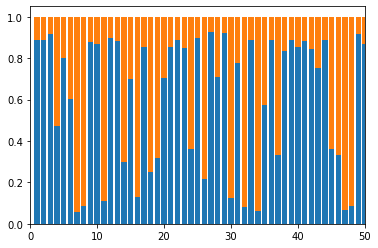

In [12]:
#plot probability of a class

pl.bar(x,prob_0)
pl.bar(x,prob_1,bottom=prob_0)
pl.xlim(0,50)

In [20]:
test_labels.values[:,1]

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1])

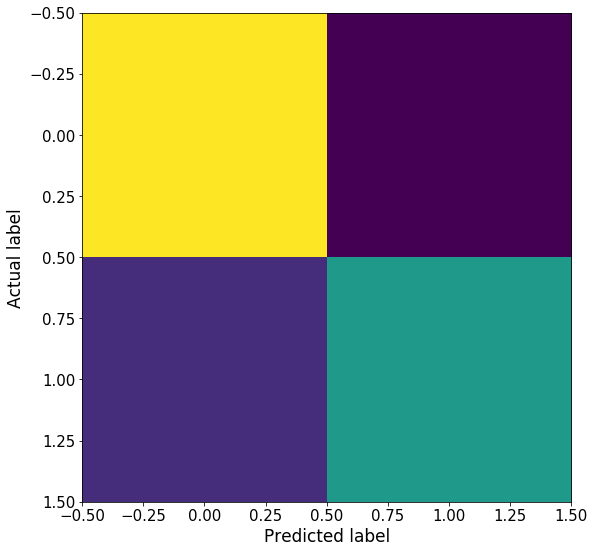

In [22]:
import matplotlib.pyplot as plt
from sklearn import metrics

cm = metrics.confusion_matrix(test_labels.values[:,0], best_model.predict(test_features))

plt.figure(figsize=(9,9))
plt.imshow(cm)
plt.ylabel('Actual label', fontsize = 17);
plt.xlabel('Predicted label', fontsize = 17);
#plt.title('Accuracy Score: {}'.format(score), size = 17);
plt.tick_params(labelsize= 15)

In [23]:
cm

array([[93, 10],
       [21, 55]])